## Initialization

Compare with tools in:
    https://trac.sdss3.org/browser/repo/platedesign/trunk/pro/plate

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.patches as mpatches
from matplotlib.collections import EllipseCollection

In [3]:
#mpl.use('Agg')
mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'savefig.dpi': 100})
mpl.rcParams.update({'savefig.bbox': 'tight'})

In [4]:
import scipy.linalg
import scipy.interpolate

In [5]:
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord,EarthLocation,AltAz,ICRS,Angle
from astropy.wcs import WCS

In [6]:
from astropy import constants as const

In [7]:
from astropy.io import fits

In [8]:
from astropy.utils.data import download_file
from astropy.utils import iers
iers.IERS.iers_table = iers.IERS_A.open(download_file(iers.IERS_A_URL, cache=True))

In [9]:
import json, os

In [10]:
import urllib2, base64

In [11]:
# pip install pydl
from pydl.pydlutils import yanny

In [12]:
import subprocess

## Only checkout relevant directories of svn products

In [13]:
# svn checkout --depth empty http://www.sdss3.org/svn/repo/platedesign/trunk platedesign
# svn update --parents --set-depth infinity platedesign/data/boss
# svn update --parents --set-depth infinity platedesign/data/sdss

# svn checkout --depth empty http://www.sdss3.org/svn/repo/platelist/trunk platelist
# svn update --parents --set-depth infinity platelist/plates/0061XX/006114

In [14]:
def svn_init_repo(repo_name, local_dir, branch='trunk', remote_url='http://www.sdss3.org/svn/repo'):
    remote_path = os.path.join(remote_url, repo_name, branch)
    local_path = os.path.join(local_dir, repo_name, branch)
    p = subprocess.Popen('svn checkout --depth empty %s %s' % (remote_path, local_path), stdout=subprocess.PIPE, shell=True)
    output, err = p.communicate()
    return output, err

In [15]:
def svn_update_subdir(subdir, repo_name, local_dir, branch='trunk'):
    local_path = os.path.join(local_dir, repo_name, branch, subdir)
    p = subprocess.Popen('svn update --parents --set-depth infinity %s' % local_path, stdout=subprocess.PIPE, shell=True)
    output, err = p.communicate()
    return output, err

In [16]:
SVN_ROOT='/Users/Daniel/source'

In [17]:
svn_init_repo('platelist', SVN_ROOT)

('D         /Users/Daniel/source/platelist/trunk/plates\nChecked out revision 163275.\n',
 None)

In [18]:
o,e = svn_init_repo('platedesign', SVN_ROOT)
print o

D         /Users/Daniel/source/platedesign/trunk/data
Checked out revision 163275.



In [19]:
o,e = svn_update_subdir('data/sdss', 'platedesign', SVN_ROOT)
print o

A    /Users/Daniel/source/platedesign/trunk/data
Updating '/Users/Daniel/source/platedesign/trunk/data/sdss':
A    /Users/Daniel/source/platedesign/trunk/data/sdss
A    /Users/Daniel/source/platedesign/trunk/data/sdss/g_codes_alignment.txt
A    /Users/Daniel/source/platedesign/trunk/data/sdss/g_codes_lighttrap.txt
A    /Users/Daniel/source/platedesign/trunk/data/sdss/SDSS3GuideFbrHrnssNumSysV1.pdf
A    /Users/Daniel/source/platedesign/trunk/data/sdss/sdss_newguide.par
A    /Users/Daniel/source/platedesign/trunk/data/sdss/fiberBlocks.par
A    /Users/Daniel/source/platedesign/trunk/data/sdss/g_codes_completion_lco.txt
A    /Users/Daniel/source/platedesign/trunk/data/sdss/g_codes_object.txt
A    /Users/Daniel/source/platedesign/trunk/data/sdss/plPlugMapP-blank.par
A    /Users/Daniel/source/platedesign/trunk/data/sdss/image-heights.txt
A    /Users/Daniel/source/platedesign/trunk/data/sdss/g_codes_completion.txt
A    /Users/Daniel/source/platedesign/trunk/data/sdss/plParam_LCO.par
A    /Use

In [20]:
o,e = svn_update_subdir('data/boss', 'platedesign', SVN_ROOT)
print o

Updating '/Users/Daniel/source/platedesign/trunk/data/boss':
A    /Users/Daniel/source/platedesign/trunk/data/boss
A    /Users/Daniel/source/platedesign/trunk/data/boss/SDSS3FiberReach.pdf
A    /Users/Daniel/source/platedesign/trunk/data/boss/SDSS3SFAnchrBlcks.pdf
A    /Users/Daniel/source/platedesign/trunk/data/boss/SDSS3FiberReachData.pdf
A    /Users/Daniel/source/platedesign/trunk/data/boss/fiberBlocksBOSSOld.par
A    /Users/Daniel/source/platedesign/trunk/data/boss/fiberBlocksBOSS.par
A    /Users/Daniel/source/platedesign/trunk/data/boss/fiberBlocksBOSS.ps
Updated to revision 163275.



## Configuration

In [21]:
apo = EarthLocation.from_geodetic(lat='32d46m49s', lon='-105d49m13s', height=2788.*u.m)
apo_pressure = 73*u.kPa 
apo_temp = 15*u.deg_C

In [22]:
const.atmosphere

<Constant name=u'Atmosphere' value=101325 error=0.0 units='Pa' reference=u'CODATA 2010'>

In [23]:
def barometric_formula(h, p0=const.atmosphere, T=288.15*u.K, air_molar_mass=0.0289644*u.kg/u.mol):
    return (p0*np.exp(-h*air_molar_mass*const.g0/(const.R*T))).to(u.kPa)
barometric_formula(2788*u.m)

<Quantity 72.80555642765819 kPa>

In [24]:
boss_root = '/data/sas/dr12/boss/spectro/redux/'
boss_version = 'v5_7_0'

In [25]:
o,e = svn_update_subdir('plates/0042XX/004203', 'platelist', SVN_ROOT)
print o

A    /Users/Daniel/source/platelist/trunk/plates
A    /Users/Daniel/source/platelist/trunk/plates/0042XX
Updating '/Users/Daniel/source/platelist/trunk/plates/0042XX/004203':
A    /Users/Daniel/source/platelist/trunk/plates/0042XX/004203
A    /Users/Daniel/source/platelist/trunk/plates/0042XX/004203/plateLines-004203-block-blue.ps
A    /Users/Daniel/source/platelist/trunk/plates/0042XX/004203/plateLines-004203-zoffset-300.ps
A    /Users/Daniel/source/platelist/trunk/plates/0042XX/004203/plateLines-004203-block-blue.png
A    /Users/Daniel/source/platelist/trunk/plates/0042XX/004203/plateLines-004203-zoffset-300.png
A    /Users/Daniel/source/platelist/trunk/plates/0042XX/004203/plateLines-004203-block-cyan.ps
A    /Users/Daniel/source/platelist/trunk/plates/0042XX/004203/plPlugMapP-4203.par
A    /Users/Daniel/source/platelist/trunk/plates/0042XX/004203/plateHolesSorted-004203.par
A    /Users/Daniel/source/platelist/trunk/plates/0042XX/004203/plateLines-004203-block-cyan.png
A    /Users/D

In [26]:
plateholes_filename = os.path.join(SVN_ROOT, 'platelist', 'trunk','plates','0042XX','004203','plateHolesSorted-004203.par')
plateholes = yanny.yanny(plateholes_filename)

In [27]:
platescale = 217.7358 # mm/deg

In [28]:
ha_design = float(plateholes['ha'].split()[0])

## Exposure Info

In [29]:
cframe_name = os.path.join(boss_root, boss_version, str(4203), 'spCFrame-b2-00119099.fits')

In [30]:
cframe_hdu = fits.open(cframe_name)

In [31]:
start_tai = cframe_hdu[0].header['TAI-BEG']

In [32]:
exp_start = Time(start_tai/86400, format='mjd', scale='tai', location=apo)
exp_start.sidereal_time('apparent')

<Longitude 21.768329028833318 hourangle>

In [33]:
exp_start.sidereal_time('apparent').hour*u.hour

<Quantity 21.768329028833318 h>

In [34]:
exp_ha0 = exp_start - exp_start.sidereal_time('apparent').hour*u.hour
print exp_ha0.sidereal_time('apparent').hour*u.hour

23.9404023609 h


In [35]:
exp_nominal = exp_start - (exp_start.sidereal_time('apparent').hour*u.hour - Angle((cframe_hdu[0].header['ra'])*u.deg).hour*u.hour - ha_design/15.0*u.hour)
print exp_nominal.sidereal_time('apparent').hour*u.hour

22.5500394556 h


In [36]:
telescope_pointing = SkyCoord(ra=cframe_hdu[0].header['ra']*u.degree, dec=cframe_hdu[0].header['dec']*u.degree, frame='fk5')

In [37]:
telescope_altaz = telescope_pointing.transform_to(
    AltAz(obstime=exp_nominal, location=apo, obswl=5400*u.angstrom, 
          pressure=apo_pressure, temperature=apo_temp))

In [38]:
telescope_altaz.alt, telescope_altaz.az

(<Latitude 57.28813388343486 deg>, <Longitude 180.0507968025163 deg>)

In [39]:
telescope_pointing.transform_to(
    AltAz(obstime=exp_nominal, location=apo, obswl=4000*u.angstrom, 
          pressure=apo_pressure, temperature=apo_temp)).alt

<Latitude 57.28825843409226 deg>

In [42]:
def exposure_ha(cframe):
    # Process CFrame header keywords
    obs_ra = cframe.header['RADEG']
    obs_dec = cframe.header['DECDEG']
    taibeg = cframe.header['TAI-BEG']
    taiend = cframe.header['TAI-END']

    taimid = 0.5*(taibeg+taiend)
    
    telescope_pointing = SkyCoord(ra=obs_ra*u.degree, dec=obs_dec*u.degree, frame='fk5')

    time = Time(taimid/86400.0, format='mjd', scale='tai', location=apo)
    lst = time.sidereal_time('apparent')

    ha = (lst - telescope_pointing.ra)
    
    print obs_ra, obs_dec, lst

exposure_ha(cframe_hdu[0])

338.22 0.0 21h53m37.6377s


## ADR example

In [43]:
alts = np.linspace(50,90,5)
alt_pointings = SkyCoord(0*u.deg, alts*u.deg, frame='altaz', location=apo, obstime=Time.now())
a_wlen = np.empty((71, 5))
wlens = np.linspace(3500, 10500, 71)
for i,wlen in enumerate(wlens):
    a_wlen[i] = alt_pointings.transform_to(
        AltAz(location=apo, obswl=wlen*u.angstrom, pressure=apo_pressure, temperature=apo_temp)).alt.value 
print wlens[5], wlens[19]

4000.0 5400.0


50.009771233 50.0096086316
60.0067266376 60.0066146967
70.0042417517 70.0041711615
80.0020552236 80.0020210207
90.0 90.0


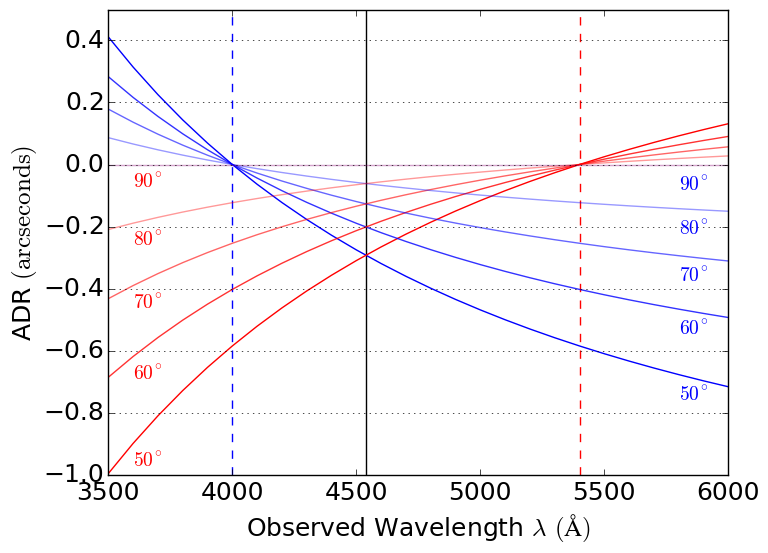

In [44]:
fig = plt.figure(figsize=(8,6))
mpl.rcParams.update({'font.size': 18})
for i in np.arange(a_wlen.shape[1]):
    print a_wlen[5,i], a_wlen[19,i]
    plt.plot(np.linspace(3500, 10500, 71), (a_wlen[:,i]-a_wlen[5,i])*u.degree.to(u.arcsec), c='b', alpha=1-.2*i)
    plt.plot(np.linspace(3500, 10500, 71), (a_wlen[19,i]-a_wlen[:,i])*u.degree.to(u.arcsec), c='r', alpha=1-.2*i)
    plt.text( 3600,  (a_wlen[19,i]-a_wlen[1,i])*u.degree.to(u.arcsec)-0.075, r'$%d^\circ$'%alts[i], fontsize=14, color='r')
    plt.text( 5800,  (a_wlen[23,i]-a_wlen[5,i])*u.degree.to(u.arcsec)-0.085, r'$%d^\circ$'%alts[i], fontsize=14, color='b')
plt.ylabel('ADR $(\mathrm{arcseconds})$')
plt.xlabel('Observed Wavelength $\lambda$ $(\AA)$')
plt.xlim(3500,6000)
plt.ylim(-1, 0.5)
plt.axvline(4000, ls='--', c='b', zorder=0)
plt.axvline(5400, ls='--', c='r', zorder=0)
plt.axvline(4539, ls='-', c='k', zorder=0)
plt.grid(axis='y')

## Hour Angle

In [45]:
delta_nominal = np.linspace(-12, 12, 1000)*u.hour
times = exp_nominal + delta_nominal
altazframe = AltAz(obstime=times, location=apo)
pointing_altazs = telescope_pointing.transform_to(altazframe)

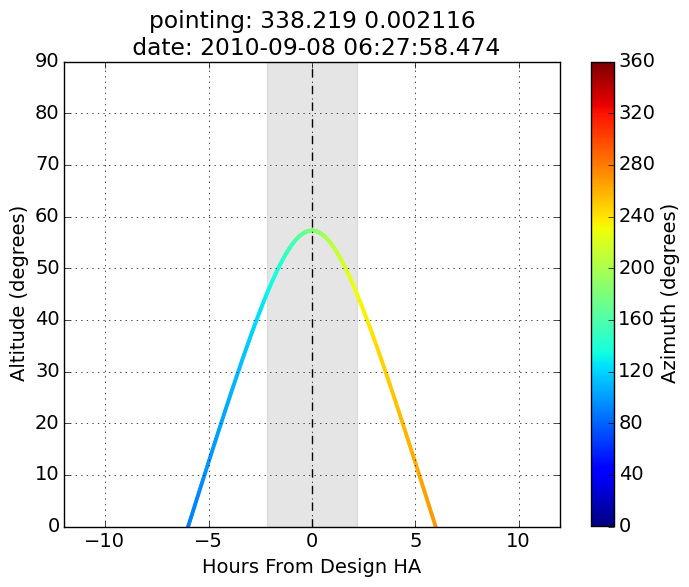

In [46]:
mpl.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.scatter(delta_nominal, pointing_altazs.alt, c=pointing_altazs.az, lw=0, s=8)
plt.fill_between(delta_nominal, 0, 90, pointing_altazs.alt > 45*u.deg, color='0.5', zorder=0, alpha=.2)  
# plt.fill_between(delta_nominal, 0, 90, pointing_altazs.alt > 60*u.deg, color='k', zorder=0)
plt.title('pointing: %s\n date: %s' % (telescope_pointing.to_string(), exp_nominal.iso))
plt.axvline(-ha_design/15.0, ls='--', c='k')
plt.colorbar().set_label('Azimuth (degrees)')
plt.ylim(0,90)
plt.ylabel('Altitude (degrees)')
plt.xlim(-12, 12) 
plt.xlabel('Hours From Design HA')  
plt.grid()

## Focal Plane Coordinates

In [47]:
def init_pointing(alt0,az0):
    if not isinstance(alt0,np.ndarray) and not isinstance(az0,np.ndarray):
        alt0,az0 = np.array((alt0,)),np.array((az0,))
        unpack = True
    else:
        unpack = False
    assert alt0.shape == az0.shape,'alt0 and az0 must have the same length.'
    assert len(alt0.shape) == 1,'alt0 and az0 must be 1D arrays.'
    return alt0,az0,unpack

In [48]:
def altaz_to_fp(alt,az,alt0,az0):
    """
    Convert (alt,az) vectors to focal plane coordinates.
    
    Input arrays alt and az of targets must have the same shape ST, and input arrays
    alt0 and az0 of boresights must have the same shape SB.  The result is a an array
    of shape (ST,SB,2).
    
    Args:
        alt(numpy.ndarray): Array of target altitudes in radians above the horizon.
        az(numpy.ndarray): Array of target azimuthal angles in radians east of north.
        alt0(numpy.ndarray): Array of boresight altitudes in radians above the horizon.
        az0(numpy.ndarray): Array of boresight azimuthal angles in radians east of north.
        
    Returns:
        numpy.ndarray: Array of shape (ST,SB,2) of focal plane coordinates (x,y) in radians,
        with +x along the azimuth direction (increasing eastwards) and +y along the altitude
        direction (increasing towards zenith).
    """
    assert alt.shape == az.shape,'alt and az have different shapes.'
    alt0,az0,unpack = init_pointing(alt0,az0)
    # Convert (alt,az) to unit vectors.
    cos_alt = np.cos(alt)
    u = np.array((np.sin(az)*cos_alt,np.cos(az)*cos_alt,np.sin(alt)))
    # Build combined rotation matrices R[-alt0,x].R[+az0,z].
    R = np.empty(shape=[3,3]+list(alt0.shape))
    cos_alt0 = np.cos(alt0)
    sin_alt0 = np.sin(alt0)
    cos_az0 = np.cos(az0)
    sin_az0 = np.sin(az0)
    zero = np.zeros_like(alt0)
    R[0] = (cos_az0,-sin_az0,zero)
    R[1] = (cos_alt0*sin_az0,cos_alt0*cos_az0,sin_alt0)
    R[2] = (-sin_alt0*sin_az0,-cos_az0*sin_alt0,cos_alt0)
    # Transform u to v.
    v = np.einsum('ijn,j...->in...',R,u)
    # Convert unit vectors to (x,y).
    x,y = v[0],v[2]
    if unpack:
        x,y = x[0],y[0]
    return x,y

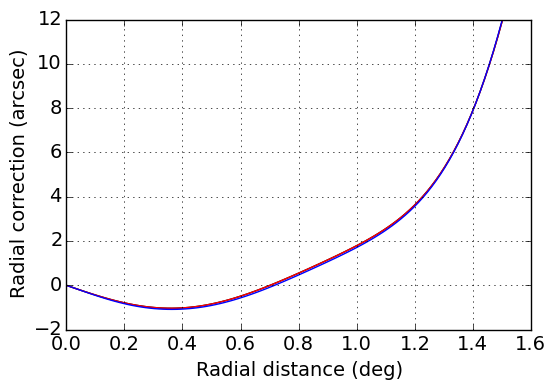

In [49]:
class FocalDistortion():
    def __init__(self, nr=100, rmax=1.5):
        # platedesign: nr=10, rmax=15
        
        # optical distortion coefs are saved in plParams file
        plParams_filename = os.path.join(SVN_ROOT, 'platedesign', 'trunk', 'data', 'sdss', 'plParam.par')
        self.plParams = yanny.yanny(plParams_filename)
        
        # coef are in units of mm
        self.opt_dist_coefs = [float(coef) for coef in self.plParams['optDistCoeff'].split()]
        self.platescale = float(self.plParams['optDistScale']) # mm/degree
        
        self.nr = nr
        self.rmax = 1.5
        self.r = np.arcsin(np.deg2rad(np.linspace(0, self.rmax, self.nr)))
        self.opt_dist = np.polynomial.polynomial.polyval(np.rad2deg(self.r)*self.platescale, self.opt_dist_coefs)
        self.opt_dist_interp = scipy.interpolate.interp1d(self.r, np.deg2rad(self.opt_dist/self.platescale))
        
        
        # image heights
        image_heights_filename = os.path.join(SVN_ROOT, 'platedesign', 'trunk','data', 'sdss', 'image-heights.txt')
        image_heights = np.loadtxt(image_heights_filename)
        self.wave_0 = image_heights[0,0]
        self.height_0 = image_heights[0,1:]
        
        isort = np.argsort(image_heights[:,0])
                
        self.waves = np.empty(image_heights.shape[0])
        self.waves = image_heights[:,0]
        self.heights = np.empty((image_heights.shape[0], image_heights.shape[1]-1))
        self.heights[0] = self.height_0
        self.heights[1:] = image_heights[1:,1:] + self.height_0
        
        # reorder by increasing wavelength
        self.waves = self.waves[isort]
        self.heights = np.deg2rad(self.heights[isort]/self.platescale)
        self.height_0 = np.deg2rad(self.height_0/self.platescale)
        self.wave_r = np.deg2rad(np.linspace(0,90.0,10)/60.0)
        
        self.frac_dist = np.ones_like(self.heights)
        self.frac_dist[:,1:] = 1 + (self.heights[:,1:]-self.height_0[1:])/self.height_0[1:]
            
    def get_frac_dist(self, rfocal, wave):
        fracdistort = scipy.interpolate.RectBivariateSpline(
            self.wave_r, self.waves, self.frac_dist.transpose())
        rdist = np.empty_like(rfocal)
        for i in range(len(rfocal)):
            rdist[i] = rfocal[i]*fracdistort(rfocal[i], wave[i])
        return rdist
        
    def plot_distortion(self):
        plt.plot(np.rad2deg(self.r), 3600*np.rad2deg(self.opt_dist_interp(self.r)), ls='--', label='Distortion')
        plt.ylabel('Radial correction (arcsec)')
        plt.xlabel('Radial distance (deg)')
        plt.grid()
        
    def plot_wave_distortion(self):
#         for iw, wave in enumerate(self.waves):
#             plt.plot(np.rad2deg(self.wave_r), 
#                      3600*(np.rad2deg(self.heights[iw]) - np.rad2deg(self.wave_r)), ls='--')
            
#             rdistort = self.get_frac_dist(self.r, wave*np.ones_like(self.r))
#             rdistort_corr = self.opt_dist_interp(self.r) + rdistort
#             plt.plot(np.rad2deg(self.r), 3600*(np.rad2deg(rdistort) - np.rad2deg(self.r)))
#             plt.plot(np.rad2deg(self.r), 3600*(np.rad2deg(self.opt_dist_interp(self.r))), ls='-.')
            
        r_opt_distort = self.opt_dist_interp(self.r)
        r_wave_distort = self.get_frac_dist(self.r, 5400*np.ones_like(self.r)) - self.r
        r_wave_distort_4000 = self.get_frac_dist(self.r, 4000*np.ones_like(self.r)) - self.r
#         plt.plot(np.rad2deg(self.r), -3600*(np.rad2deg(r_opt_distort)), c='black')
        plt.plot(np.rad2deg(self.r), 3600*(np.rad2deg(r_opt_distort)), c='black')
        plt.plot(np.rad2deg(self.r), 3600*(np.rad2deg(r_wave_distort+r_opt_distort)), c='red')
        plt.plot(np.rad2deg(self.r), 3600*(np.rad2deg(r_wave_distort_4000+r_opt_distort)), c='blue')

        plt.ylabel('Radial correction (arcsec)')
        plt.xlabel('Radial distance (deg)')
        plt.grid()
        

fd = FocalDistortion(rmax=1.5)      
fd.plot_wave_distortion()

In [50]:
def radec_to_fp(ra, dec, wave, ra0, dec0, wave0, when, no_opt_correction=False, no_opt_wave_correction=False,
                location=apo, pressure=apo_pressure, temperature=apo_temp, verbose=False, when0=None):
    """
    Convert (ra,dec) vectors to focal plane coordinates.
    """
    assert ra.shape == dec.shape, 'ra and dec have different shapes.'
    
    config = dict(location=location, pressure=pressure, temperature=temperature)
    
    plate_center = SkyCoord(ra=ra0, dec=dec0, frame='icrs')
    plate_fid = SkyCoord(ra=ra0, dec=dec0+1.5*u.deg, frame='icrs')
    targets = SkyCoord(ra=ra, dec=dec, frame='icrs')
        
    alt = np.empty(len(ra))
    az = np.empty_like(alt)
    
    for lam in np.unique(wave):
        ilam = (wave == lam)
        if verbose:
            print 'Num lambda_eff = %r: %d' % (lam, np.sum(ilam))
        lam_frame = AltAz(obstime=when, obswl=lam, **config)
        lam_altaz = targets[ilam].transform_to(lam_frame)
        alt[ilam] = lam_altaz.alt.to(u.rad).value
        az[ilam] = lam_altaz.az.to(u.rad).value

    if when0:
        assert no_opt_correction
        assert no_opt_wave_correction
        frame0 = AltAz(obstime=when0, obswl=wave0, **config)
    else:
        frame0 = AltAz(obstime=when, obswl=wave0, **config)
    altaz0 = plate_center.transform_to(frame0)
    alt0 = altaz0.alt.to(u.rad).value
    az0 = altaz0.az.to(u.rad).value
            
    xfocal, yfocal = altaz_to_fp(alt,az,alt0,az0)
    
    if not no_opt_correction or not no_opt_wave_correction:
        rfocal = np.sqrt(xfocal**2 + yfocal**2)
        
        focal_distortion = FocalDistortion(rmax=1.5)                
        
        if not no_opt_correction:
            rfocal += focal_distortion.opt_dist_interp(rfocal)

        if not no_opt_wave_correction:
#             rf5000 = rfocal + rdistort_wave(rfocal, 5000*np.ones(len(rfocal)))
#             rfthis = rfocal + rdistort_wave(rfocal, wave.value)
#             rfoff = rfthis - rf5000
#             if verbose:
#                 print rfoff
#             rfocal += rfoff
            
            rfocal = focal_distortion.get_frac_dist(rfocal, wave.value)
                
        pos_angle = np.arctan2(yfocal, xfocal)
        xfocal = rfocal*np.cos(pos_angle)
        yfocal = rfocal*np.sin(pos_angle)
    
    altaz_fid = plate_fid.transform_to(frame0)
    alt_fid = altaz_fid.alt.to(u.rad).value
    az_fid = altaz_fid.az.to(u.rad).value
    xfid, yfid = altaz_to_fp(np.array(alt_fid), np.array(az_fid), alt0, az0)
        
    
    pos_angle_fid = np.arctan2(xfid, yfid)
    xrot = xfocal*np.cos(pos_angle_fid) - yfocal*np.sin(pos_angle_fid)
    yrot = xfocal*np.sin(pos_angle_fid) + yfocal*np.cos(pos_angle_fid)

    return -xrot, yrot

## Ideal Guiding

In [51]:
def guide(x0,y0,x,y):
    """
    Find the scale,rotation and offset that minimizes the residuals between the transformed x,y and x0,y0.
    """
    assert x0.shape == y0.shape,'x0,y0 have different shapes.'
    assert x.shape == y.shape,'x,y have different shapes.'
    assert x0.shape == x.shape,'x0,y0 have different shape from x,y.'
    xy0 = np.concatenate([x0.flat,y0.flat])
    x = x.flatten()
    y = y.flatten()
    xy = np.concatenate([x,y])
    n = len(xy)
    A = np.empty((n,4))
    for i in range(n//2):
        A[i,:] = (x[i],-y[i],1.,0.)
        A[n//2+i,:] = (y[i],x[i],0.,1.)
    params,xy_residuals,rank,sing = scipy.linalg.lstsq(A,xy0)
    scale = np.sqrt(params[0]**2+params[1]**2)
    rotation = np.arctan2(params[1],params[0])
    dx,dy = params[2:]
    return scale,rotation,dx,dy

def correct(x,y,scale,rotation,dx,dy):
    scos = scale*np.cos(rotation)
    ssin = scale*np.sin(rotation)
    return (scos*x - ssin*y + dx,ssin*x + scos*y + dy)

In [52]:
def get_plateholes_filename(plateid, branch='trunk'):
    plateid_str = str(plateid).rjust(6,'0')
    platedirtop = plateid_str[:-2]+'XX'
    plateholes_basename = 'plateHolesSorted-%s.par' % plateid_str
    return os.path.join(SVN_ROOT, 'platelist', branch, 'plates', platedirtop, plateid_str, plateholes_basename)

In [53]:
class PlateGuideDerivs(object):
    """
    Represents a telescope observation.
    """
    def __init__(self, plateid, when=exp_ha0, where=apo, exp_time=6*u.hour, nt=17, legacy_guide=False,
                 pointing=1, guideon=5400*u.angstrom, no_opt_correction=False, no_opt_wave_correction=False, 
                 no_tracking=False, no_guiding=False):
        
        self.when = when
        self.where = where
        self.guideon = guideon
    
        plateholes_filename = get_plateholes_filename(plateid)
        plateholes = yanny.yanny(plateholes_filename)

        self.design_ha = float(plateholes['ha'].split()[pointing-1])
        self.design_temp = float(plateholes['temp'])*u.deg_C

        self.plate_ra = float(plateholes['raCen'])
        self.plate_dec = float(plateholes['decCen'])

        print 'Design HA: ', self.design_ha
        print 'Design Temp: ', self.design_temp
        print 'Plate RA: ', self.plate_ra
        print 'Plate Dec: ', self.plate_dec

        full = plateholes['STRUCT1']

        igood = (np.array(full['target_ra']) != 0) & \
            (np.array(full['target_dec']) != 0) & \
            (np.array(full['pointing']) == pointing)
            
        self.ngood = np.sum(igood)

        self.ra         = np.array(full['target_ra'])[igood]
        self.dec        = np.array(full['target_dec'])[igood]
        self.lambda_eff = np.array(full['lambda_eff'])[igood]
        self.xforig     = np.array(full['xfocal'])[igood]
        self.yforig     = np.array(full['yfocal'])[igood]

        print 'Num igood: ', np.sum(igood)
        
        if no_tracking:
            when0 = self.when
            no_opt_correction=True
            no_opt_wave_correction=True
        else:
            when0 = None

        self.xfocal, self.yfocal = radec_to_fp(self.ra*u.deg, self.dec*u.deg, self.lambda_eff*u.angstrom,
            self.plate_ra*u.deg, self.plate_dec*u.deg, self.guideon, 
            self.when, no_opt_correction=no_opt_correction, no_opt_wave_correction=no_opt_wave_correction,
            location=self.where, temperature=self.design_temp, verbose=True, when0=when0)

#         print 3600/platescale*np.sum(np.sqrt((self.xforig-np.rad2deg(self.xfocal)*platescale)**2 + \
#                              (self.yforig-np.rad2deg(self.yfocal)*platescale)**2))/self.ngood

        self.iguide = (np.array(full['holetype'])[igood] == 'GUIDE')
        self.i5400 = (self.lambda_eff == 5400)
        self.istandards = (np.array(full['targettype'])[igood] == 'standard')
        
        print 'Num guide fibers: ', np.sum(self.iguide)

        self.nt = nt
        self.tvec = when + np.linspace(-0.5*exp_time,+0.5*exp_time,self.nt)
        self.dt_min = (self.tvec - self.when).to(u.min).value
        self.x_target = np.empty((nt,self.ngood))
        self.y_target = np.empty((nt,self.ngood))
        self.guiding = np.zeros((nt,4))
        for it in range(self.nt):
            self.x_target[it], self.y_target[it] = radec_to_fp((self.ra*u.deg), (self.dec*u.deg), self.lambda_eff*u.angstrom,
                (self.plate_ra*u.deg), (self.plate_dec*u.deg), self.guideon, 
                self.tvec[it], no_opt_correction=no_opt_correction, no_opt_wave_correction=no_opt_wave_correction,
                location=self.where, temperature=self.design_temp, when0=when0)
            # Find the the scale,rotation and offset that minimizes the residuals between the
            # targets and fibers.
            
            if not no_guiding:
                if legacy_guide:
                    mask = self.i5400
                else:
                    mask = self.iguide
                self.guiding[it] = guide(self.xfocal[mask],self.yfocal[mask],self.x_target[it][mask],self.y_target[it][mask])
                # Apply guiding corrections to all fibers.
                self.x_target[it],self.y_target[it] = correct(self.x_target[it],self.y_target[it],*self.guiding[it])
        
    def plot_deltas(self, zoom=10):
        fig = plt.figure(figsize=(7,6))
        
        print 3600.0/platescale*np.average(
            np.sqrt((np.rad2deg(self.xfocal)*platescale - self.xforig)**2+\
                    (np.rad2deg(self.yfocal)*platescale - self.yforig)**2))
        
        for ix in range(self.ngood):
            x_delta = np.rad2deg(self.xfocal[ix])*platescale - self.xforig[ix]
            y_delta = np.rad2deg(self.yfocal[ix])*platescale - self.yforig[ix]
            x_zoom = self.xforig[ix] + zoom*x_delta*np.arange(2)
            y_zoom = self.yforig[ix] + zoom*y_delta*np.arange(2)
            
            rsq = x_zoom**2 + y_zoom**2
            if rsq[0] < rsq[1]:
                color='blue'
            else:
                color='red'
            
            plt.plot(y_zoom/platescale, x_zoom/platescale,  c=color, alpha=0.75)
        self.plate_plot()
        
    def plot_deltas_1d(self):
        fig = plt.figure(figsize=(7,6))
        
        print 3600.0/platescale*np.average(
            np.sqrt((np.rad2deg(self.xfocal)*platescale - self.xforig)**2+\
                    (np.rad2deg(self.yfocal)*platescale - self.yforig)**2))
        
        rfocal = np.rad2deg(np.sqrt(self.xfocal**2 + self.yfocal**2))
        rforig = np.sqrt(self.xforig**2 + self.yforig**2)/platescale
        
        plt.scatter(rforig, 3600*(rfocal-rforig), marker='.', c='b', lw=0)
        plt.ylabel('dr (arcsec)')
        plt.xlabel('r (deg)')
        plt.xlim(0,1.525)
        plt.grid()
        plt.tight_layout()
        
    def plate_plot(self):
        plate_outline = plt.Circle((0,0), 1.5, fill=False, color='k')
        plt.gca().add_artist(plate_outline)
        plt.xlim(-1.525,1.525)
        plt.ylim(-1.525,1.525)
        plt.xlabel('Focal Plane Y (deg)')
        plt.ylabel('Focal Plane X (deg)')
        plt.axes().set_aspect('equal', 'datalim')
        plt.tight_layout()
        
    def plot_guide_dxy(self):
        rad2mas = (1*u.rad).to(u.mas).value
        plt.plot(self.dt_min,rad2mas*self.guiding[:,2],'r-',label='$\Delta x$')
        plt.plot(self.dt_min,rad2mas*self.guiding[:,3],'b--',label='$\Delta y$')
        plt.legend(loc='upper center')
        plt.xlabel('$\Delta t$ (min)')
        plt.ylabel('Guider Offsets (mas)')
        plt.grid()
        
    def plot_guide_scale(self):
        plt.plot(self.dt_min,1e6*(self.guiding[:,0]-1))
        plt.xlabel('$\Delta t$ (min)')
        plt.ylabel('Guider Scale - 1 (ppm)')
        plt.grid()
        
    def plot_guide_rotation(self):
        # self.guiding[:,1] gives rotation of focal plane relative to +y increasing in altitude.
        # self.tracking gives rotation required for sidereal tracking.
        rad2arcsec = (1*u.rad).to(u.arcsec).value
        rotation = rad2arcsec*(self.guiding[:,1])
        plt.plot(p.dt_min,rotation)
        plt.xlabel('$\Delta t$ (min)')
        plt.ylabel('Guider Rotation (arcsec)')
        plt.grid()

In [54]:
p = PlateGuideDerivs(4203, when=exp_ha0, exp_time=3*u.hour, nt=19)

Design HA:  0.0
Design Temp:  8.0 deg_C
Plate RA:  338.22
Plate Dec:  0.0
Num igood:  1019
Num lambda_eff = <Quantity 4000.0 Angstrom>: 178
Num lambda_eff = <Quantity 5400.0 Angstrom>: 841
Num guide fibers:  16


In [55]:
def plot_single_target(pgd, itarget, wave=np.linspace(4000,7000,7), no_tracking=False):
    
    cmap = matplotlib.cm.ScalarMappable(
        matplotlib.colors.Normalize(vmin=3500,vmax=7500),'spectral')
        
    nwave = len(wave)
    x_target = np.empty((pgd.nt, nwave))
    y_target = np.empty((pgd.nt, nwave))

    target_ra = pgd.ra[itarget]*np.ones(nwave)
    target_dec = pgd.dec[itarget]*np.ones(nwave)

    for it in range(pgd.nt):
        x_target[it], y_target[it] = radec_to_fp((target_ra*u.deg), (target_dec*u.deg), wave*u.angstrom,
            (pgd.plate_ra*u.deg), (pgd.plate_dec*u.deg), pgd.guideon,
            pgd.tvec[it], location=pgd.where, temperature=pgd.design_temp)
        x_target[it], y_target[it] = correct(x_target[it], y_target[it], *pgd.guiding[it])

    fig = plt.figure(figsize=(8,6))
    
    fig.add_subplot(111, aspect='equal')

    for iw, wave in enumerate(wave):
        color = cmap.to_rgba(wave)
        dx = 3600*np.rad2deg(x_target[:,iw]-pgd.xfocal[itarget])
        dy = 3600*np.rad2deg(y_target[:,iw]-pgd.yfocal[itarget])
        plt.plot(dx, dy, color=color)
        plt.plot(dx[::3], dy[::3], lw=0, marker='o', markeredgewidth=0, markersize=5, color=color)

    plt.ylim(-1.1,+1.1)
    plt.xlim(-1.1,+1.1)
    fiber_outline = plt.Circle((0,0), 1, fill=False, color='k')
    plt.gca().add_artist(fiber_outline)
    plt.xlabel(r'$x(\lambda,\ h)$ $(\mathrm{arcseconds})$')
    plt.ylabel(r'$y(\lambda,\ h)$ $(\mathrm{arcseconds})$')
#     plt.axes().set_aspect('equal', 'datalim')
    plt.grid()
    
    plt.tight_layout()

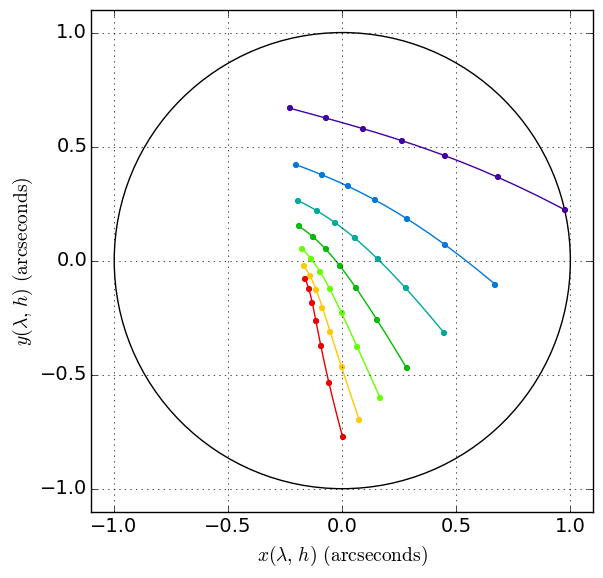

In [56]:
plot_single_target(p, 200)

In [57]:
def plot_guide_derivs(p, zoom=1000, show_fiber_positions=False):
    
    target_indices = np.arange(p.ngood)
    print np.min(p.ra), np.max(p.ra)
    for ix in target_indices:
        x_zoom = p.xfocal[ix] + zoom*(p.x_target[:,ix]-p.xfocal[ix])
        y_zoom = p.yfocal[ix] + zoom*(p.y_target[:,ix]-p.yfocal[ix])
        if p.lambda_eff[ix] == 5400:
            color = 'red'
        else:
            color = 'blue'    
        if p.iguide[ix]:
            lw = 0.5
        else:
            lw = 0.5
        plt.plot(np.rad2deg(x_zoom), np.rad2deg(y_zoom), c=color, lw=lw)
    if show_fiber_positions:
        plt.scatter(np.rad2deg(p.xfocal), np.rad2deg(p.yfocal), marker='.', lw=0, c=p.ra)
        plt.colorbar()
            
#     if zoom < 1:
#         six_hour_scale = (6.0*15.0)*zoom
#         plt.plot(-1.3+np.array([0, six_hour_scale]), [-1.45, -1.45], c='k')
#         plt.text(-1.25, -1.4, r'6$\mathrm{h}$', fontsize=14)
#     else:
#         two_arcsec_scale = (2.0/3600.0)*zoom
#         plt.plot(-1.3+np.array([0, two_arcsec_scale]), [-1.45, -1.45], c='k')
#         plt.text(-1.25, -1.4, r'2${}^{\prime\prime}$', fontsize=14)
    plate_outline = plt.Circle((0,0), 1.5, fill=False, color='k')
    plt.gca().add_artist(plate_outline)
    plt.xlim(-1.65,1.65)
    plt.ylim(-1.65,1.65)
    plt.xlabel(r'$x(\lambda_\mathrm{design},\ h)$ $(\mathrm{degrees})$')
    plt.ylabel(r'$y(\lambda_\mathrm{design},\ h)$ $(\mathrm{degrees})$')
#     plt.axes().set_aspect('equal', 'datalim')
    plt.tight_layout()

336.76533 339.69081


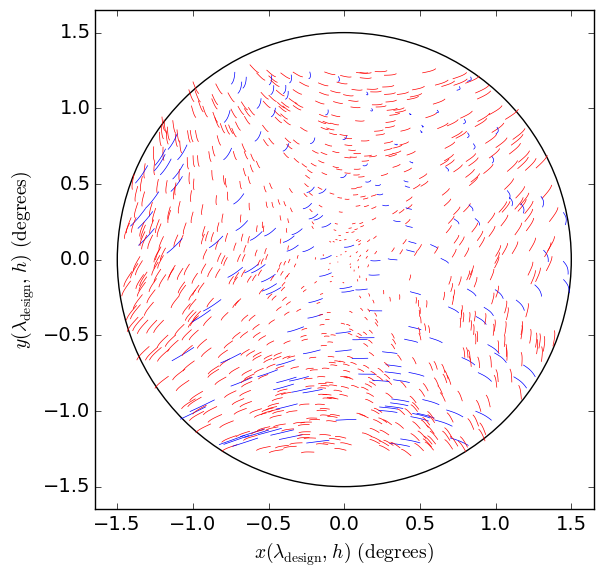

In [58]:
fig = plt.figure(figsize=(8,6))    
fig.add_subplot(111, aspect='equal')
plot_guide_derivs(p, zoom=360)

In [59]:
p_noguide = PlateGuideDerivs(4203, when=exp_ha0, exp_time=3*u.hour, nt=19, legacy_guide=False, no_guiding=True)

Design HA:  0.0
Design Temp:  8.0 deg_C
Plate RA:  338.22
Plate Dec:  0.0
Num igood:  1019
Num lambda_eff = <Quantity 4000.0 Angstrom>: 178
Num lambda_eff = <Quantity 5400.0 Angstrom>: 841
Num guide fibers:  16


336.76533 339.69081


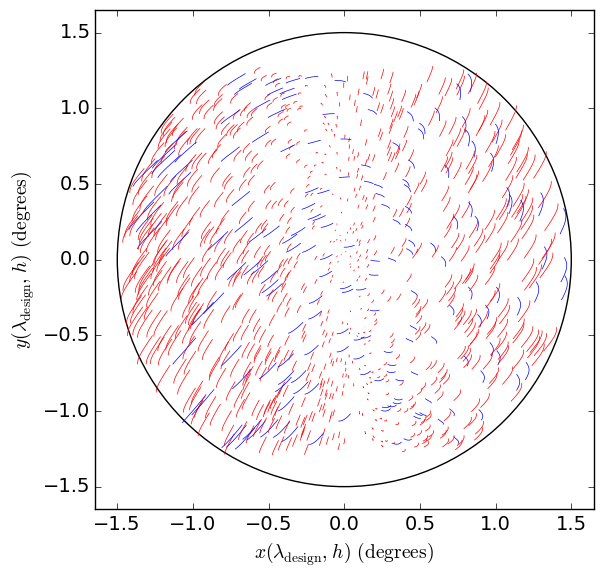

In [60]:
fig = plt.figure(figsize=(8,6))    
fig.add_subplot(111, aspect='equal')
plot_guide_derivs(p_noguide, zoom=360)

In [61]:
p_notracking = PlateGuideDerivs(4203, when=exp_ha0, exp_time=3*u.hour, nt=19, legacy_guide=False, no_tracking=True, no_guiding=True)

Design HA:  0.0
Design Temp:  8.0 deg_C
Plate RA:  338.22
Plate Dec:  0.0
Num igood:  1019
Num lambda_eff = <Quantity 4000.0 Angstrom>: 178
Num lambda_eff = <Quantity 5400.0 Angstrom>: 841
Num guide fibers:  16


336.76533 339.69081


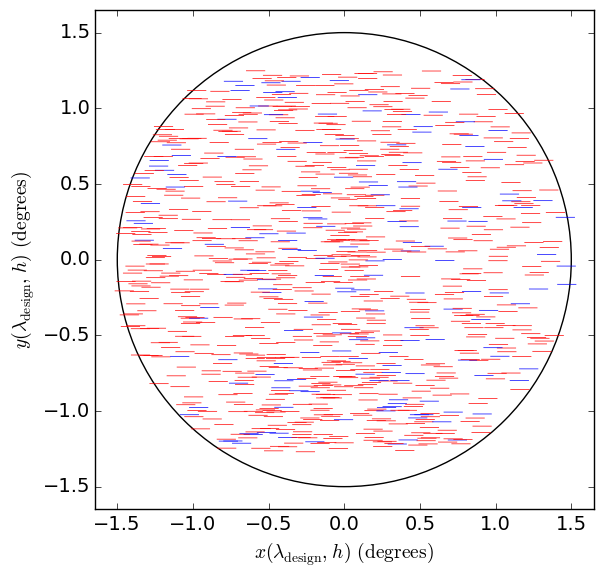

In [62]:
fig = plt.figure(figsize=(8,6))    
fig.add_subplot(111, aspect='equal')
plot_guide_derivs(p_notracking, zoom=1.0/360.0)

336.76533 339.69081
336.76533 339.69081
336.76533 339.69081


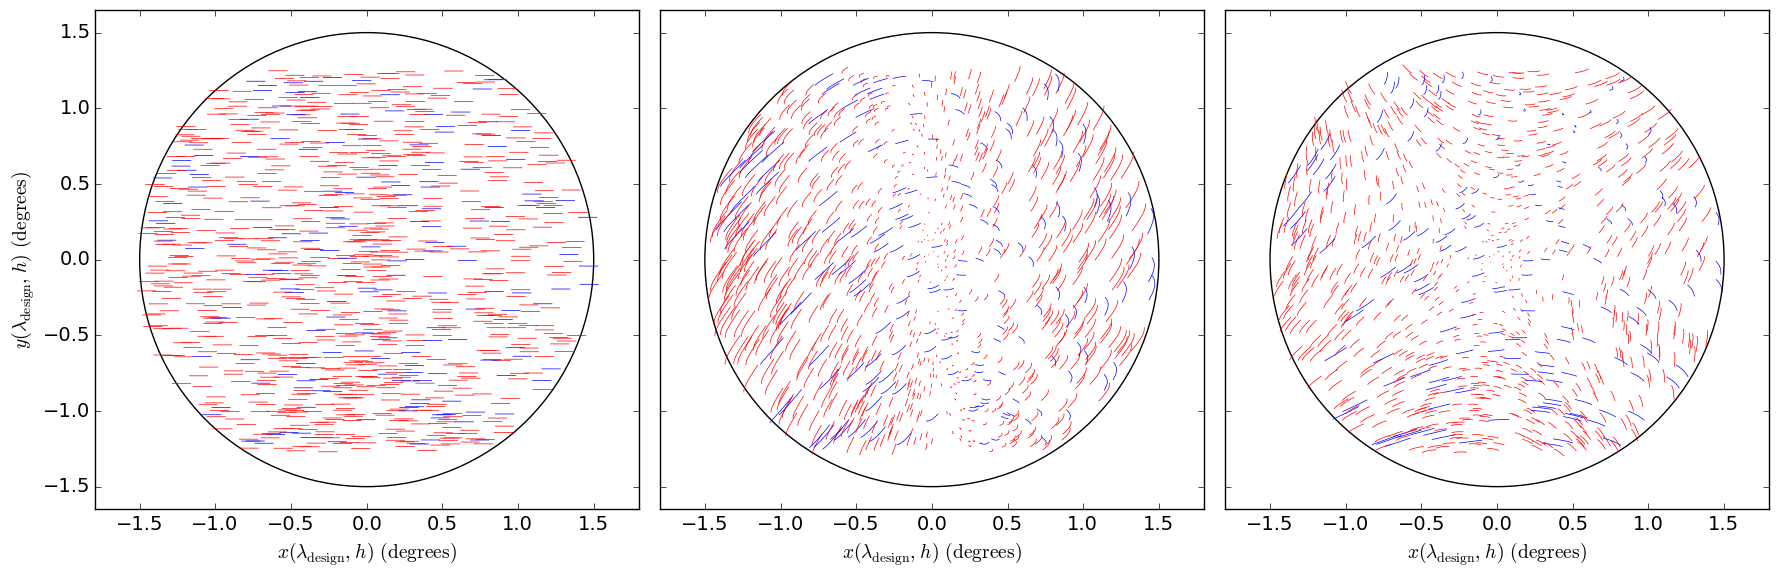

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18,6))  
plt.sca(ax1)
ax1.set_aspect('equal')
plot_guide_derivs(p_notracking, zoom=1.0/360.0)
plt.sca(ax2)
ax2.set_aspect('equal')
plot_guide_derivs(p_noguide, zoom=360)
plt.sca(ax3)
ax3.set_aspect('equal')
plot_guide_derivs(p, zoom=360)
# fig.subplots_adjust(wspace=0)
for a in fig.axes[1:]:
    a.set_ylabel('')
# plt.setp([a.get_yticklabels() for a in fig.axes[1:]], visible=False)
plt.tight_layout()

0.343157999003


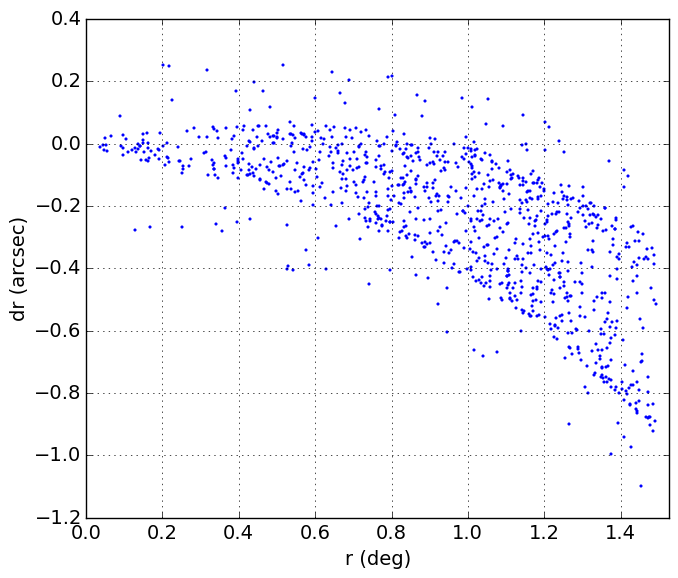

In [64]:
p.plot_deltas_1d()

In [65]:
p2 = PlateGuideDerivs(4203, when=exp_ha0, no_opt_wave_correction=True)

Design HA:  0.0
Design Temp:  8.0 deg_C
Plate RA:  338.22
Plate Dec:  0.0
Num igood:  1019
Num lambda_eff = <Quantity 4000.0 Angstrom>: 178
Num lambda_eff = <Quantity 5400.0 Angstrom>: 841
Num guide fibers:  16


0.340845559462


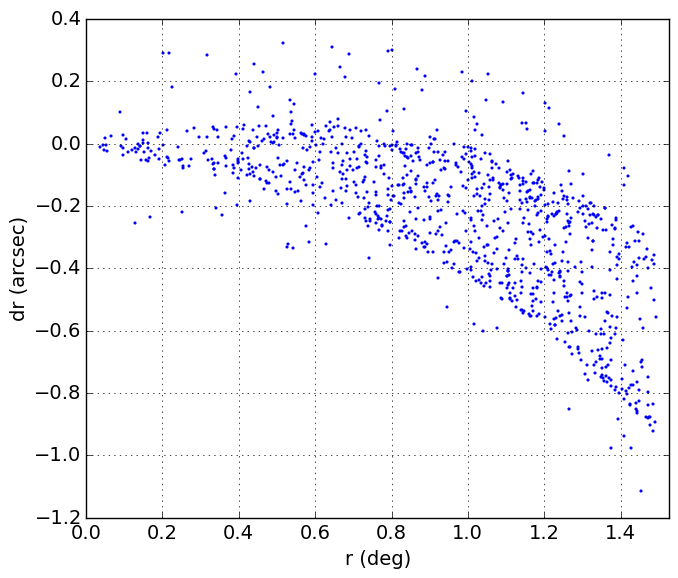

In [66]:
p2.plot_deltas_1d()

In [ ]:
p3 = PlateGuideDerivs(4203, when=exp_ha0, no_opt_correction=True, no_opt_wave_correction=True)

Design HA:  0.0
Design Temp:  8.0 deg_C
Plate RA:  338.22
Plate Dec:  0.0
Num igood:  1019
Num lambda_eff = <Quantity 4000.0 Angstrom>: 178
Num lambda_eff = <Quantity 5400.0 Angstrom>: 841
Num guide fibers:  16


In [ ]:
p3.plot_deltas_1d()
plt.ylim(-.5,1.2)
plt.xlim(0,.8)

In [ ]:
p4 = PlateGuideDerivs(4203, when=exp_ha0, no_opt_correction=True, no_opt_wave_correction=False)
p4.plot_deltas_1d()
plt.ylim(-.5,1.2)
plt.xlim(0,.8)